In [121]:
import tensorflow as tf
import numpy as np

x = np.array([[1.0, 2.1],[1.9, 3.2],[3.0, 3.9],[4.2, 5.2]])
y = np.array([[3.1], [4.0], [5.1], [6.1]])

# (X'X)^-1
theta_normalEquation = np.transpose(x).dot(x)
theta_normalEquation.shape
invMatrix = np.linalg.inv(theta_normalEquation)
print(invMatrix)

# (X'y)
multiply_Xt_y = np.transpose(x).dot(y)
multiply_Xt_y

#Se calcula los parámetros theta finales
normalEquation_computed = invMatrix.dot(multiply_Xt_y)
normalEquation_computed


print(normalEquation_computed)

[[ 1.51464333 -1.11056098]
 [-1.11056098  0.83185596]]
[[-0.57509596]
 [ 1.66806685]]


In [3]:
node1 = tf.constant(5.0) # tensor []
node2 = tf.constant(2.0) # tensor []
node3 = tf.constant(3.0) # tensor []
node4 = tf.multiply(node1, node2) # operación
node5 = tf.add(node3, node2) # operación
node6 = tf.subtract(node4, node5) # operación
print(node1)

Tensor("Const:0", shape=(), dtype=float32)


In [4]:
g1 = tf.Graph() # gráfica computacional 
g2 = tf.Graph() # gráfica computacional

with g1.as_default():
    a = tf.constant(1)
    b = tf.constant(2)
    c = tf.add(a, b)
    
with g2.as_default():
    e = tf.constant(3)
    f = tf.constant(4)
    g = tf.add(e, f)
    
# para ejecutar las gráfias computacionales abrimos una sesión

#extracting value with sess.run function.

with tf.Session() as sess:
    outs  = sess.run(node6)
    print("outs = {}".format(outs))
    
#extracting value with eval function.

with tf.Session() as sess:
    print('node6 = {}'.format(node6.eval()))
    print('node4 = {}'.format(node4.eval()))

#extracting value with sess.run function using a vector of nodes.
    
with tf.Session() as sess:
    outs  = sess.run([node6, node4, node5])
    print("outs = {}".format(outs))
    
# the Session is stored in a variable

sess = tf.Session()
outs = sess.run(node6)
sess.close() # the session is closed
print("outs = {}".format(outs))

outs = 5.0
node6 = 5.0
node4 = 10.0
outs = [5.0, 10.0, 5.0]
outs = 5.0


In [5]:
with tf.Session(graph=g1) as sess:
    print(sess.run(c))
    
with tf.Session(graph=g2) as sess:
    print(sess.run(g))

3
7


In [6]:
#convierte una matriz de numpy a un tensor

# We open a session creating a tensor 3x3 with ones

with tf.Session() as sess:
    a = np.ones((3, 3))
    b = tf.convert_to_tensor(a).eval()

print(b)

# We open a session creating a tensor 2x2 with zeros

with tf.Session() as sess:
    print(tf.zeros((2,2)).eval())

# We open a session creating a tensor 2x2 with ones

with tf.Session() as sess:
    print(tf.ones((2,2)).eval())
    
# We open a session creating a tensor 3x2 with random numbers

with tf.Session() as sess:
    print(tf.random_normal((3, 2), # shape
                           0, # mean
                           1).eval()) # sd

# We open a session creating a tensor 3x2 with uniform random numbers

with tf.Session() as sess:
    print(tf.random_uniform((3, 2), # shape
                           0, # minval
                           1).eval()) # maxval

# We open a session creating a tensor 3x2 full of 4s

with tf.Session() as sess:
    print(tf.fill((3, 2), # shape
                   4).eval()) # value

# We open a session creating a tensor of real numbers equally spaced

with tf.Session() as sess:
    print(tf.linspace(0.0, 1.0, 11).eval()) # value

# We open a session creating a constant tensor from a list of lists that respresent a matrix

with tf.Session() as sess:
    print(tf.constant([[1, 2, 3],
                       [4, 5, 6]]).eval()) # value

# generate a tensor mixing the elements from a constant tensor

with tf.Session() as sess:
    print(tf.random_shuffle(tf.constant([1, 2, 3, 4, 5, 6])).eval()) # value

# Create a tensor from a list of list that represent a matrix

with tf.Session() as sess:
    m = tf.constant([[1, 2, 3],
                    [4, 5, 6]])
    
# add columns of a tensor

with tf.Session() as sess:
    print(tf.reduce_sum(m, reduction_indices = 0).eval()) # value

# add rows of a tensor

with tf.Session() as sess:
    print(tf.reduce_sum(m, reduction_indices = 1).eval()) # value

# add all elements form a tensor

with tf.Session() as sess:
    print(tf.reduce_sum(m).eval()) # value


[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[0. 0.]
 [0. 0.]]
[[1. 1.]
 [1. 1.]]
[[-1.238934   -1.625975  ]
 [-1.0841106  -0.75123787]
 [ 1.2081153   0.47818813]]
[[0.41382003 0.48771095]
 [0.00613713 0.82116973]
 [0.71435034 0.6808059 ]]
[[4 4]
 [4 4]
 [4 4]]
[0.         0.1        0.2        0.3        0.4        0.5
 0.6        0.7        0.8        0.90000004 1.        ]
[[1 2 3]
 [4 5 6]]
[2 6 4 5 3 1]
[5 7 9]
[ 6 15]
21


In [7]:
# obtain thw shape of a tensor

with tf.Session() as sess:
    m = tf.constant([[1, 2, 3],
                    [4, 5, 6]])
    print(m.get_shape())

# sum of two tensor

with tf.Session() as sess:
    a = m + m
    print(a.eval())
    
# reshape of a tensor

with tf.Session() as sess:
    print(tf.reshape(m, (1, 6)).eval())
    
# sum every element of a tensor

with tf.Session() as sess:
    a = tf.constant([[1, 2],
                     [3, 4]])
    b = tf.constant([[5, 0],
                     [0, 6]])
    print(tf.accumulate_n([a, b, a]).eval())
    
# sum every element of a tensor

with tf.Session() as sess:
    print(tf.add_n([a, b, a]).eval())

# search the maximum value in the tensor and return the position counting from zero 

with tf.Session() as sess:
    print(tf.argmax(tf.constant([1, 2, 3, 4, 0])).eval())

with tf.Session() as sess:
    print(tf.argmin(tf.constant([1, 2, 3, 4, 0])).eval())

(2, 3)
[[ 2  4  6]
 [ 8 10 12]]
[[1 2 3 4 5 6]]
[[ 7  4]
 [ 6 14]]
[[ 7  4]
 [ 6 14]]
3
4


In [8]:
# apply a function for each element of a vector

f = lambda m : tf.cond(tf.greater_equal(m, 0.0),
                       true_fn = lambda : tf.constant(1.0),
                       false_fn = lambda : tf.constant(0.0))

# define the tensor x

x = tf.constant([1.0, -1.0])

# apply the function f for each element of x

y = tf.map_fn(f, x)

with tf.Session() as sess:
    print(sess.run(y))

Instructions for updating:
Colocations handled automatically by placer.
[1. 0.]


In [9]:
# Activity: for the matrix X and y, compute z=(X′X)−1X′y and p = Xz

X = np.array([[1.0, 2.1], 
              [1.9, 3.2],
              [3.0, 3.9],
              [4.2, 5.2]])

y = np.array([[1.0], 
              [1.9],
              [3.0],
              [4.2]])

z = np.linalg.inv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
p = np.dot(X, z)
print(p)

[[1. ]
 [1.9]
 [3. ]
 [4.2]]


In [10]:
## define a, b y c como placeholders
x = tf.placeholder(tf.float32)

## define los nodos de cómputo
node1 = tf.multiply(0.3, tf.pow(x, 3))
node2 = tf.multiply(0.6, tf.pow(x, 2))
nodesubs1 = tf.subtract(node1, node2)
node3 = tf.multiply(0.1, x)
nodesubs2 = tf.subtract(nodesubs1, node3)
nodeadd = tf.add(nodesubs2, 0.5)


## evalua la operación para diferentes valores de a, b y c.
with tf.Session() as sess:
    print(sess.run(nodeadd, feed_dict={x:(1.0, 4.2, 3.1, 6.3)}))

[ 0.09999999 11.7224      3.3613     51.07011   ]


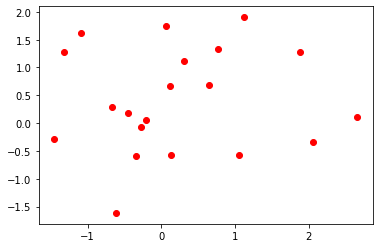

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

## Genera un tensor de 2x20 con valores aleatorios
a = tf.random_normal([2, 20])

## Realiza el cómputo
with tf.Session() as sess:
    result = sess.run(a)

## Asigna las columnas de la matriz a x y y
x, y = result

## Construye el gráfico
plt.scatter(x, y, color='red');

In [12]:
#inplementación del and - x1 && x2

def sigmoid(z):
    f = 1/(1+ 2.7 ** (- int(z)))
    return f

def neural_networks(data_test_layer_1):
    y = []
    for i in data_test_layer_1:
        z = np.dot(theta_layer_1.reshape(1,3), i.reshape(3,1))
        hx_layer2 = sigmoid(z[0][0])
        print(hx_layer2)
        if(hx_layer2 >= 0.5):
            y.append(1)
        else:
            y.append(0)
    
    return np.array(y)

theta_layer_1 = np.array([-30, 20, 20])
data_test_layer_1 = np.array([[1, 1, 1],
                             [1, 1, 0],
                             [1, 0, 1],
                             [1, 0, 0]])

print(neural_networks(data_test_layer_1))

0.9999514330013718
4.8566998628269686e-05
4.8566998628269686e-05
1.1457426376711864e-13
[1 0 0 0]


In [13]:
0.9999514330013718 + 4.8566998628269686e-05 + 4.8566998628269686e-05 + 1.1457426376711864e-13

1.000048566998743

In [14]:
import tensorflow as tf
import numpy as np

# we are definiting a operacion as follows: 5 * 3 - (3 + 2).

node1 = tf.constant(5.0) # tensor[]
node2= tf.constant(2.0) # tensor[]
node3 = tf.constant(3.0) # tensor[]
node4 = tf.multiply(node1, node3) # operacion
node5 = tf.add(node3, node2) # operacion
node6 = tf.subtract(node4,node5) # operacion

In [15]:
print(node1)

Tensor("Const_14:0", shape=(), dtype=float32)


In [16]:
g1 = tf.Graph()
g2 = tf.Graph()

with g1.as_default():
    a = tf.constant(1)
    b = tf.constant(2)
    c = tf.add(a,b)
    
with g2.as_default():
    e = tf.constant(3)
    f = tf.constant(4)
    g = tf.add(e, f)

In [17]:
with tf.Session() as sess:
    outs = sess.run(node6)
    print('outs = {}'.format(outs))

with tf.Session() as sess:
    print('node6 = {}'.format(node6.eval()))
    print('node4 = {}'.format(node4.eval()))

outs = 10.0
node6 = 10.0
node4 = 15.0


In [18]:
with tf.Session() as sess:
    outs = sess.run([node6, node4, node5])
    print('outs = {}'.format(outs))

outs = [10.0, 15.0, 5.0]


In [19]:
sess = tf.Session()
outs = sess.run(node6)
sess.close()
print('outs = {}'.format(outs))

outs = 10.0


In [20]:
with tf.Session(graph = g1) as sess:
    print(sess.run(c))

3


In [21]:
with tf.Session(graph = g2) as sess:
    print(sess.run(g))

7


In [22]:
g3 = tf.Graph()
with g3.as_default():
    a = tf.constant(2.0)
    b = tf.constant(-0.9)
    c = tf.constant(2.5)
    d = tf.constant(3.8)
    e = tf.constant(4.3)
    f = tf.pow(a, 3)
    g = tf.multiply(b, f)
    h = tf.pow(a, 2)
    i = tf.multiply(c, h)
    j = tf.add(g, i)
    k = tf.multiply(d, a)
    l = tf.add(k, e)
    m = tf.subtract(j, l)

In [23]:
with tf.Session(graph=g3) as sess:
    print(sess.run(m))

-9.099999


In [24]:
node1 = tf.constant(2.0) #tensor []  
node2 = tf.constant(-0.9) #tensor []
node3 = tf.constant(2.5) #tensor []
node4 = tf.constant(3.8) #tensor []
node5 = tf.constant(4.3) #tensor []
node6 = tf.pow(node1, 3.0)
node7 = tf.multiply(node2, node6)
node8 = tf.pow(node1, 2.0)
node9 = tf.multiply(node3, node8)
node10 = tf.add(node7, node9)
node11 = tf.multiply(node4, node1)
node12 = tf.add(node11, node5)
node13 = tf.subtract(node10, node12)

In [25]:
with tf.Session() as sess:
    outs = sess.run(node13)
    print('node13 = {}'.format(outs))
    print('node13 = {}'.format(node13.eval()))

node13 = -9.09999942779541
node13 = -9.09999942779541


In [26]:
# define, a, b, c, as placeholders

a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
c = tf.placeholder(tf.float32)

# define the nodes of compute

node4 = tf.multiply(a, b)
node5 = tf.add(c, b)
node6 = tf.subtract(node4, node5)

#Evaluate the operation for different values of a, b and c.

with tf.Session() as sess:
    print(sess.run(node6, feed_dict={a: 5, b: 3, c: 2}))
    print(sess.run(node6, feed_dict={a: 4, b: 2, c: 3}))
    print(sess.run(node6, feed_dict={a: 4, b: 3, c: 1}))

10.0
3.0
8.0


In [27]:
# the same operation but it has form of matrix

a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
c = tf.placeholder(tf.float32)

# define the nodes of compute

node4 = tf.multiply(a, b)
node5 = tf.add(c, b)
node6 = tf.subtract(node4, node5)

with tf.Session() as sess:
    print(sess.run(node6, feed_dict={a: [[1, 0, 0],
                                         [0, 1, 0],
                                         [0, 0, 1]],
                                     b: np.random.normal(size=(3, 3)),
                                     c: np.random.normal(size=(3, 3))}))
    
with tf.Session() as sess:
    a = tf.constant([[1, 0, 2],
                     [2, 1, 3],
                     [4, 0, 1]])
    b = tf.constant([[1, 1, 1],
                     [3, 1, 3],
                     [2, 0, 1]])
    print(tf.multiply(a, b).eval())

[[ 0.655422   -1.5235286   2.4594855 ]
 [ 0.25211868  1.6653459   0.7867126 ]
 [-0.94943714 -0.8962312  -1.3614331 ]]
[[1 0 2]
 [6 1 9]
 [8 0 1]]


In [99]:
#Create the variable and this initialize in zero

n = tf.Variable(0)

#syntactic tree that represent the operations

node0 = tf.add(n, tf.constant(1))
node1 = tf.assign(n, node0)

#evaluate
with tf.Session() as sess:
    # the variables must be initialize before use
    sess.run(tf.global_variables_initializer())
    for i in range(5):
        #the value of the variables is retained between the calls to run()
        print(sess.run(node1))

1
2
3
4
5


In [100]:
# Create the variable and this is initialized in zero
n = tf.Variable(0)

## syntiactic tree that represent the operations
## we use tf.assign_add to simpiply the tree
## exist tf.assign_sub too
node0 = tf.assign_add(n, tf.constant(1))
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(5):
        print(sess.run(node0))



1
2
3
4
5


In [101]:
#Evaluate the function
# define x as placeholders

x = tf.placeholder(tf.float32)
#x = tf.Variable(0)

# define the nodes of compute

node1 = tf.constant(0.3)
node2 = tf.multiply(node1, tf.pow(x, 3))
node3 = tf.constant(0.6)
node4 = tf.multiply(node3, tf.pow(x, 3))
node5 = tf.constant(-0.1)
node6 = tf.multiply(node5, x)
node7 = tf.constant(0.5)
node8 = tf.subtract(node2, node4)
node9 = tf.subtract(node6, node7)
node10 = tf.subtract(node8, node9)


#Evaluate the operation for different values of vector x

with tf.Session() as sess:
    for i in range(4):
        print(sess.run(node10, feed_dict={x:[1.0, 4.2, 3.1, 6.3]}))

[  0.3      -21.306398  -8.127299 -73.88412 ]
[  0.3      -21.306398  -8.127299 -73.88412 ]
[  0.3      -21.306398  -8.127299 -73.88412 ]
[  0.3      -21.306398  -8.127299 -73.88412 ]


In [102]:
# fibonacci serie

#withouth tensorflow

f = 0
g = 0

x = input('Enter a number x ')

for i in range(int(x)):
    
    if i == 0:
        f = 0
    elif i == 1:
        g = 1
    else:
        a = g
        g = f + g
        f = a
    print(g)

Enter a number x 6
0
1
1
2
3
5


In [106]:
##### Create the variable and this initialize in zero

f = tf.Variable(0)
g = tf.Variable(1)

x = input('Enter a number x ')

#syntactic tree that represent the operations

newterm = tf.add(f, g)

# open a new session

with tf.control_dependencies([newterm]) as sess:    
    node_1 = tf.assign(f, g)
    with tf.control_dependencies([node_1]) as sess:
        node_2 = tf.assign(g, newterm)

# initialize variables
init = tf.global_variables_initializer()

#evaluate
with tf.Session() as sess:
    # the variables must be initialize before use
    sess.run(tf.global_variables_initializer())
    fib = [f.eval(), g.eval()]
    for i in range(int(x)):
        print([f.eval(), g.eval()])
        next, up1, up2 = sess.run([newterm ,node_1, node_2])
        #print([up1, up2])
        fib.append(next)
    print(fib)

Enter a number x 5
[0, 1]
[1, 1]
[1, 2]
[2, 3]
[3, 5]
[0, 1, 1, 2, 3, 5, 8]


In [62]:
import tensorflow as tf

# define the first 2 terms of the sequence
a = tf.Variable(0)
b = tf.Variable(1)

# you have to force the order of assigments:
# first execute newterm, then execute update1 and than update2

# define the next term. By definition it is the sum of the previous ones
newterm = tf.add(a,b)     # or newterm = a+b

with tf.control_dependencies([newterm]):
    update1 = tf.assign(a, b)

    # thus, execute update2 after update1 and newterm
    # have been executed

    with tf.control_dependencies([update1]):
        update2 = tf.assign(b, newterm)

# initialize variables
init = tf.global_variables_initializer()

# run
with tf.Session() as sess:
    sess.run(init)
    fibonacci = [a.eval(), b.eval()]
    for i in range(10):
        next, up1, up2 = sess.run([newterm, update1, update2])
        fibonacci.append(next)
    print(fibonacci)

1
[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]


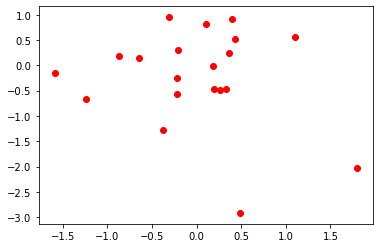

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Generate a tensor with 2*20 random numbers
a = tf.random_normal([2, 20])

# Make the compute

with tf.Session() as sess:
    result = sess.run(a)
    
# Assign the columns  of the matrix to x and y

x, y = result

# Build the graphic

plt.scatter(x, y, color='red')

# Eager Execution

In [11]:
import tensorflow as tf
import numpy as np


In [42]:
print(tf.add(1, 2))
print(tf.add([1, 2], [3, 4]))
print(tf.square(5))
print(tf.reduce_sum([1, 2, 3]))

Tensor("Add_50:0", shape=(), dtype=int32)
Tensor("Add_51:0", shape=(2,), dtype=int32)
Tensor("Square_17:0", shape=(), dtype=int32)
Tensor("Sum_17:0", shape=(), dtype=int32)


In [59]:
x = tf.matmul([[1]], [[2, 3]])
print(x.shape)
print(x.dtype)

(1, 2)
<dtype: 'int32'>


In [62]:
ndarray = np.ones([3, 3])
ndarray

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [70]:
tensor = tf.multiply(ndarray, 42)
print(tensor)
print(np.add(tensor, 1))
#print(tensor.numpy())

Tensor("Mul_7:0", shape=(3, 3), dtype=float64)
Tensor("add_56:0", shape=(3, 3), dtype=float64)


In [76]:
print("Is there a GPU available ?: ")
print(tf.test.is_gpu_available())

print("Is the Tensor on GPU #0 ?: ")
print(x.device.endswith('GPU:0'))

Is there a GPU available ?: 
False
Is the Tensor on GPU #0 ?: 
False


# Datasets in tensorflow

In [122]:
import tensorflow as tf
import numpy as np
tf.executing_eagerly()

False

In [111]:
ds_tensors = tf.data.Dataset.from_tensor_slices([1, 2, 3, 4, 5])

import tempfile
_, filename = tempfile.mkstemp()
with open(filename, 'w') as f:
    f.write("""Line 1
Line 2
Line 3
Line 4
line 5
    """)
    
ds_file = tf.data.TextLineDataset(filename)   

In [112]:
filename

'/tmp/tmpl04woiqd'

In [113]:
!cat $filename

Line 1
Line 2
Line 3
Line 4
line 5
    

In [165]:
print('Elements of ds_tensors:')

iter = ds_tensors.make_initializable_iterator()
el = iter.get_next()

print(ds_tensors.output_shapes)

with tf.Session() as sess:

    sess.run(iter.initializer)
    
    print(sess.run(el))
    print(sess.run(el))
    print(sess.run(el))
    print(sess.run(el))
    print(sess.run(el))
    
"""
print('\nElements in ds_file:')
for x in ds_file:
    print(x)
"""

Elements of ds_tensors:
()
1
2
3
4
5


"\nprint('\nElements in ds_file:')\nfor x in ds_file:\n    print(x)\n"